In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
from keras_preprocessing.image import ImageDataGenerator
from ipywidgets import IntProgress
from IPython.display import display
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import load_img
import random

INPUT_SIZE = 160

class_names = ['rock', 'paper', 'scissors']

(train_images, train_labels) = [], []
(test_images, test_labels) = [], []

tmp_train_test = []

input_root = "./input_v2/rock-paper-scissors"

train_paths = [input_root + "/train"]
test_paths = [input_root + "/test"]

file_count = 0
for root_dir, cur_dir, files in os.walk(input_root):
    file_count += len(files)

f = IntProgress(min=0, max=file_count, description='Loading:')
display(f)

for class_id, class_name in enumerate(class_names):
    for train_path in train_paths:
        for dirname, _, filenames in os.walk(os.path.join(train_path, class_name)):
            for filename in filenames:
                image = cv2.imread(os.path.join(dirname, filename))
                image = cv2.resize(image, (INPUT_SIZE, INPUT_SIZE))/255.0
                tmp_train_test.append((image, class_id))
                f.value += 1
                

random.shuffle(tmp_train_test)
X, y = zip(*tmp_train_test)

from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=42)

2022-12-11 23:04:53.629955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 23:04:53.865833: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-11 23:04:54.583814: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:
2022-12-11 23:04:54.583882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

IntProgress(value=0, description='Loading:', max=7599)

In [2]:
nb = len(class_names)

datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.3,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.2,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

np_p1 = np.array(train_images)
np_p2 = np.array(test_images)

train_images = datagen.fit(np_p1)
train_labels = np.eye(nb)[train_labels]

test_images = testgen.fit(np_p2)
test_labels = np.eye(nb)[test_labels]

In [3]:
print(np_p1.shape)
print(len(train_labels))

(5699, 160, 160, 3)
5699


In [4]:
print(np_p2.shape)
print(len(test_labels))

(1900, 160, 160, 3)
1900


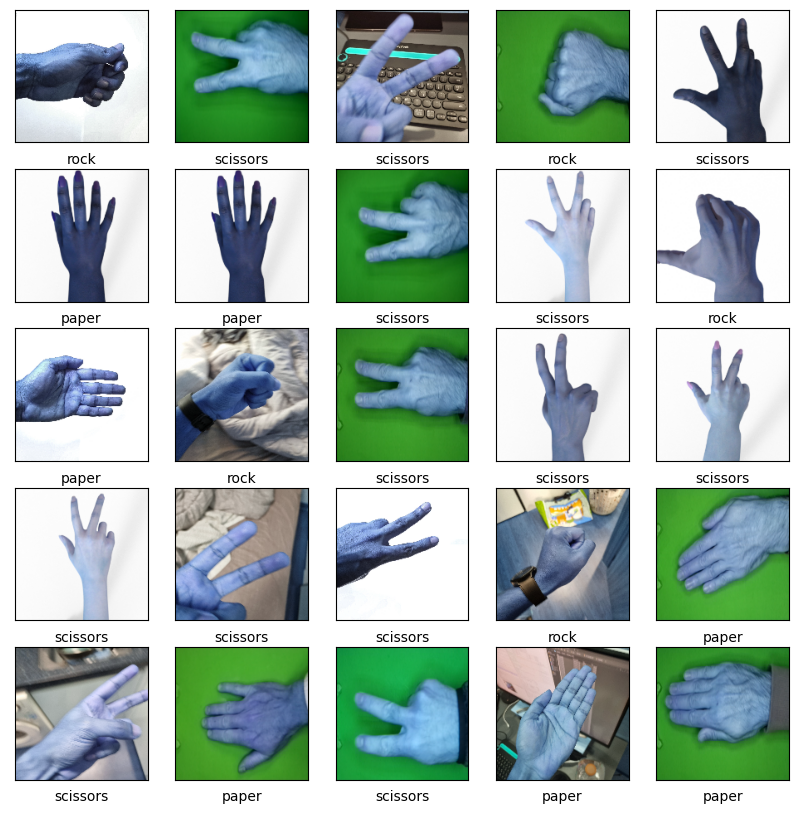

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_p2[i])
    plt.xlabel(class_names[np.argmax(test_labels[i])])
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

2022-12-11 23:08:49.690719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 23:08:49.723892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 23:08:49.724082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 23:08:49.725023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
filepath= "./output/v2/rock-paper-scissors/model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)
callbacks_list = [checkpoint, early_stopping]

In [8]:
hist = model.fit_generator(datagen.flow(np_p1, train_labels,batch_size=64),
                                        validation_data=testgen.flow(np_p2, test_labels, batch_size=32),
                                        epochs=50, callbacks=callbacks_list)

/tmp/ipykernel_1360048/3843701711.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(np_p1, train_labels,batch_size=64),


Epoch 1/50


2022-12-11 23:08:54.104146: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


90/90 [==============================] - ETA: 0s - loss: 1.0997 - accuracy: 0.3348
Epoch 1: val_accuracy improved from -inf to 0.43211, saving model to ./output/v2/rock-paper-scissors/model.h5
90/90 [==============================] - 26s 244ms/step - loss: 1.0997 - accuracy: 0.3348 - val_loss: 1.0938 - val_accuracy: 0.4321
Epoch 2/50
90/90 [==============================] - ETA: 0s - loss: 1.0538 - accuracy: 0.4041
Epoch 2: val_accuracy improved from 0.43211 to 0.51211, saving model to ./output/v2/rock-paper-scissors/model.h5
90/90 [==============================] - 21s 234ms/step - loss: 1.0538 - accuracy: 0.4041 - val_loss: 0.9030 - val_accuracy: 0.5121
Epoch 3/50
90/90 [==============================] - ETA: 0s - loss: 0.9431 - accuracy: 0.4952
Epoch 3: val_accuracy improved from 0.51211 to 0.60526, saving model to ./output/v2/rock-paper-scissors/model.h5
90/90 [==============================] - 20s 222ms/step - loss: 0.9431 - accuracy: 0.4952 - val_loss: 0.8444 - val_accuracy: 0.60

In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

(1, 160, 160, 3)


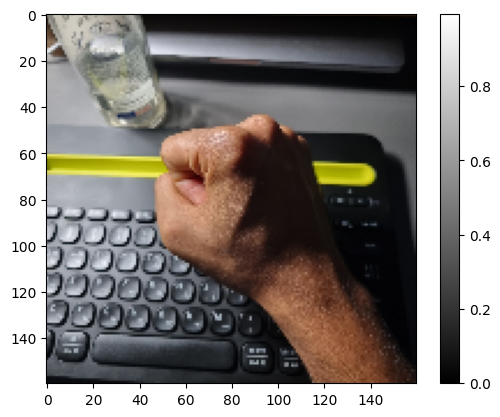

1/1 [==============================] - 0s 156ms/step
[[0.5007405  0.22596097 0.2732984 ]]
It's a > rock < With a confidence of 50.074052810668945


In [10]:
from keras.utils import load_img, img_to_array
image_tt = img_to_array(load_img(r"./validations/hand_test_2.jpg"))/255
image_tt = cv2.resize(image_tt, (INPUT_SIZE, INPUT_SIZE))
image_tt = np.expand_dims(image_tt,0)
print(image_tt.shape)

plt.figure()
plt.gray()
plt.imshow(image_tt[0])
plt.colorbar()
plt.grid(False)
plt.show()

predictions = probability_model.predict(image_tt)
print(predictions)
print("It's a >", class_names[np.argmax(predictions[0])], "< With a confidence of", predictions[0][np.argmax(predictions[0])] * 100)

In [11]:
probability_model.save(r"./output/v2/rock-paper-scissors/")

INFO:tensorflow:Assets written to: ./output/v2/rock-paper-scissors/assets


INFO:tensorflow:Assets written to: ./output/v2/rock-paper-scissors/assets
